In [245]:
import numpy as np
import pandas as pd
import pylab as pl

from scipy import stats
import graphviz
import pydotplus
import collections
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve as prc

In [142]:
df = pd.read_csv("churn.txt",index_col=['Phone'],usecols=['Phone','State','Area Code',"Int'l Plan",'VMail Plan','VMail Message','Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls','Intl Mins','Intl Calls','CustServ Calls','Churn?'])
df.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
Phone,,,,,,,,,,,,,,,
382-4657,KS,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
371-7191,OH,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
358-1921,NJ,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
375-9999,OH,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
330-6626,OK,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [143]:
#Change the types of categorical variables to category
df['State']=df['State'].astype('category')
df['Area Code']=df['Area Code'].astype('category')
df["Int'l Plan"]=df["Int'l Plan"].astype('category')
df['VMail Plan']=df['VMail Plan'].astype('category')

# scaler = MinMaxScaler()
# df[['VMail Message','Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls','Intl Mins','Intl Calls','CustServ Calls']] = scaler.fit_transform(df[['VMail Message','Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls','Intl Mins','Intl Calls','CustServ Calls']])

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['Area Code'] = le.fit_transform(df['Area Code'])
df["Int'l Plan"] = le.fit_transform(df["Int'l Plan"])
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])

#split dataset
X = df.iloc[:,:14]
y = df['Churn?']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [144]:
#CART tree
clf_CART = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf_CART.fit(X_train,y_train)
y_pred_CART = clf_CART.predict(X_test)

In [145]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred_CART)
print cm
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_CART).ravel()
print "True negative {}".format(tn)
print "False positive {}".format(fp)
print "False negative {}".format(fn)
print "True positve {}".format(tp)

[[554  25]
 [ 20  68]]
True negative 554
False positive 25
False negative 20
True positve 68


In [146]:
#Accuracy
print('Accuracy (TP+TN/TP+TN+FP+FN) : {:.5f}'.format((float(tp)+tn)/(float(tp)+tn+fp+fn)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred_CART)))
#Overall error rate
print ('Overall error rate (1-Accuracy): {:.5f}'.format(1-accuracy_score(y_test,y_pred_CART)))

Accuracy (TP+TN/TP+TN+FP+FN) : 0.93253
Accuracy: 0.93253
Overall error rate (1-Accuracy): 0.06747


In [147]:
#Sensitivity
sensitivity = float(tp)/(float(tp)+float(fn))
print('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity))
#False positive rate
print('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp)/(float(fp)+float(tn))))
print('False positive rate (1-specificity): {:.5f}').format(1-(float(tn)/(float(tn)+float(fp))))

Sensitivy/recall (TP/TP+FN): 0.77273
False positive rate (FP/FP+TN): 0.04318
False positive rate (1-specificity): 0.04318


In [148]:
#Specificity
specificity = float(tn)/(float(tn)+float(fp))
print('Specificity (TN/TN+FP): {:.5f}'.format(specificity))
#False negative rate
print('False negative rate (FN/FN+TP): {:.5f}'.format(float(fn)/(float(fn)+tp)))
print('False negative rate (1-sensitivity): {:.5f}').format(1-sensitivity)

Specificity (TN/TN+FP): 0.95682
False negative rate (FN/FN+TP): 0.22727
False negative rate (1-sensitivity): 0.22727


In [149]:
#Proportion of true positives
precision = float(tp)/(float(tp)+float(fp))
print('Proportion of true positives/precision (TP/TP+FP): {:5f}'.format(precision))
#Proportion of false positives
print('Proportion of false positives (FP/FP+TP): {:.5f}'.format(float(fp)/(float(fp)+float(tp))))
print('Proportion of false positives (1-PTP): {:.5f}'.format(1-float(tp)/(float(tp)+float(fp))))

Proportion of true positives/precision (TP/TP+FP): 0.731183
Proportion of false positives (FP/FP+TP): 0.26882
Proportion of false positives (1-PTP): 0.26882


In [150]:
#Proportion of true negatives
print('Proportion of true negatives (TN/TN+FN): {:.5f}'.format(float(tn)/(float(tn)+float(fn))))
#Proportion of false negatives
print('Proportion of false negatives (FN/FN+TN): {:.5f}'.format(float(fn)/(float(fn)+float(tn))))
print('Proportion of false negatives (1-PTN): {:.5f}'.format(1-float(tn)/(float(tn)+float(fn))))

Proportion of true negatives (TN/TN+FN): 0.96516
Proportion of false negatives (FN/FN+TN): 0.03484
Proportion of false negatives (1-PTN): 0.03484


In [151]:
#F1 score
print('F1 score (2*(Recall*Precision)/(Recall+Precision)): {}'.format(2*(sensitivity*precision)/(sensitivity+precision)))
print('F1 score): {}'.format(f1_score(y_test, y_pred_CART, average=None)))

F1 score (2*(Recall*Precision)/(Recall+Precision)): 0.75138121547
F1 score): [ 0.96097138  0.75138122]


In [152]:
#Overall model cost
y_test_dummy = pd.get_dummies(y_test)
y_pred_dummy = pd.get_dummies(y_pred_CART)
print('Overall model cost - MAE to compenaste for outliers: {:.5f}'.format(mean_absolute_error(y_test_dummy,y_pred_dummy)))

Overall model cost - MAE to compenaste for outliers: 8.63568


In [153]:
from sklearn.metrics import classification_report
print classification_report(y_test,clf_CART.predict(X_test))

              precision    recall  f1-score   support

      False.       0.97      0.96      0.96       579
       True.       0.73      0.77      0.75        88

   micro avg       0.93      0.93      0.93       667
   macro avg       0.85      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



Positive = customer predicted to churn. Losing a customer is expensive and interceding with potential churner is cheap.

FN - meaning that we have predicted that someone will not churn, but they churned anywhay, which will cost more.

FP - meaning that we have predicted that someone will churn and they did not, which is less costly.

This yields that **false negative(FN)** will be more costly to the business.


In [154]:
clf_CART_weights = tree.DecisionTreeClassifier(criterion='gini',max_depth=5, class_weight ={'True.':10})
clf_CART_weights.fit(X_train,y_train)
y_pred_CART_weights = clf_CART_weights.predict(X_test)

In [281]:
#confusion matrix
print('Confusion matrix without weights')
cm = confusion_matrix(y_test,y_pred_CART)
print cm
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_CART).ravel()
print "True negative {}".format(tn)
print "False positive {}".format(fp)
print "False negative {}".format(fn)
print "True positve {}".format(tp)
print('\n')

#confusion matrix
cm2 = confusion_matrix(y_test,y_pred_CART_weights)
print('Confusion matrix for weight 10 set to the prefered class True.')
print cm2
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_CART_weights).ravel()
print "True negative {}".format(tn2)
print "False positive {}".format(fp2)
print "False negative {}".format(fn2)
print "True positve {}".format(tp2)

Confusion matrix without weights
[[554  25]
 [ 20  68]]
True negative 554
False positive 25
False negative 20
True positve 68


Confusion matrix for weight 10 set to the prefered class True.
[[516  63]
 [ 15  73]]
True negative 516
False positive 63
False negative 15
True positve 73


In [156]:
#Comparison of the false positive, false negative
print('FP of default model: {} / FN of adjusted weifht: {}'.format(fp, fn))
print('FP of the adjusted model: {} / FN of adjusted weifht: {}'.format(fp2, fn2))
print('We managed to adjust the FN as we already concluded that they will be more costly')

FP of default model: 25 / FN of adjusted weifht: 20
FP of the adjusted model: 63 / FN of adjusted weifht: 15
We managed to adjust the FN as we already concluded that they will be more costly


In [157]:
 #Comparison of sensitivity, specificity and overall error rate
print('Sensitivity of the default model {}'.format(sensitivity))
print('Sensitivity of the adjusted model {}'.format(float(tp2)/(float(tp2)+float(fn2))))
print('The adjusted model predicts more accurately the clients that will churn from all the actual clients that churn, which is expected as we gave the class True. higher weight.')
print('\n')
print('Specificty of the default model {}'.format(specificity))
print('Specificty of the adjusted model {}'.format(float(tn2)/(float(tn2)+float(fp2))))
print('The adjusted model performs worse in predicting the clients that do not churn, which is also expected since the model will be inclined to predict more positive values, but the actual negative values will stay the same. Thu the ratio of correctly predicted negative observations to the total actual negative observation will be lower.')
print('\n')
print('Overall error rate of the default model {}'.format(1-accuracy_score(y_test,y_pred_CART)))
print('Overall error rate of the adjusted model {}'.format(1-accuracy_score(y_test,y_pred_CART_weights)))
print('The overall error rate of the adjusted model is bigger as the model is inclined to make more positive predictions and thus there will be more FP')
print('\n')


Sensitivity of the default model 0.772727272727
Sensitivity of the adjusted model 0.829545454545
The adjusted model predicts more accurately the clients that will churn from all the actual clients that churn, which is expected as we gave the class True. higher weight.


Specificty of the default model 0.956822107081
Specificty of the adjusted model 0.891191709845
The adjusted model performs worse in predicting the clients that do not churn, which is also expected since the model will be inclined to predict more positive values, but the actual negative values will stay the same. Thu the ratio of correctly predicted negative observations to the total actual negative observation will be lower.


Overall error rate of the default model 0.0674662668666
Overall error rate of the adjusted model 0.116941529235
The overall error rate of the adjusted model is bigger as the model is inclined to make more positive predictions and thus there will be more FP




TP - a client that was correctly classified to churn - No money gained or lost

FP - incorrectly predicted client that was expected to churn but did not - The company will earn 500EUR on average

TN - a cleint that was expected to churn and did so - No money gained or lost

FN - a client that churned even though he was not expected to - The company will lose 600EUR on average

In [158]:
#Cost/benefit analysis
def revenue(TP,FP,TN,FN):
    return 0*TP-500*FP+TN*0+600*FN

default_model = revenue(tp,fp,tn,fn)
adjusted_model = revenue(tp2,fp2,tn2,fn2)

print('Cost based on the default model: {}'.format(default_model))
print('Cost based on the adjusted model: {}'.format(adjusted_model))
print('Estimated cost savings {} after the deployment of the adjusted model'.format(default_model - adjusted_model))

Cost based on the default model: -500
Cost based on the adjusted model: -22500
Estimated cost savings 22000 after the deployment of the adjusted model


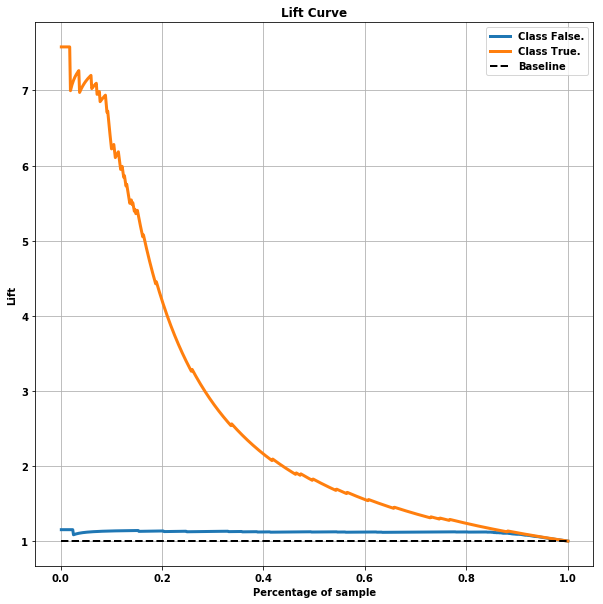

In [287]:
#lift curve default model
#The lift curve shows how many times more than average the model reaches targets when a given percentage of the population that is most likely to be target according to the model is considered.
import scikitplot as skplt
y_probas = clf_CART.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(10,10)).legend(loc='upper right')

Lift at 20% - 4, 33% - 2.5, 40% - 2.2, 50% - 1.8

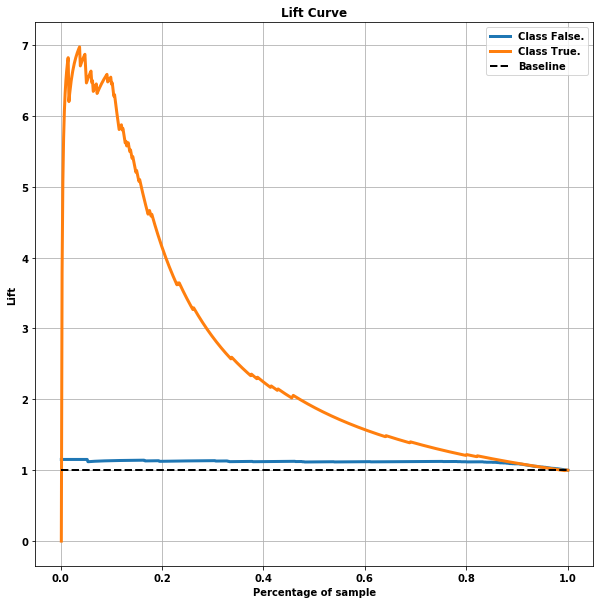

In [288]:
y_probas_weights = clf_CART_weights.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas_weights, figsize=(10,10)).legend(loc='upper right')

Lift at 20% - 4, 33% - 2.5, 40% - 2.2, 50% - 1.8

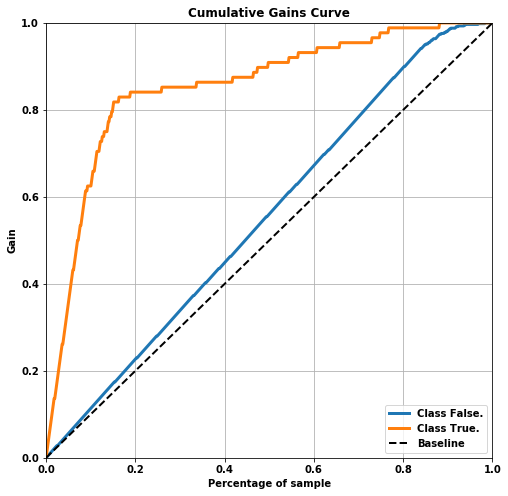

In [203]:
# The cumulative gains curve is an evaluation curve that assesses the performance of your model. It shows the percentage of targets reached when considering a certain percentage of your population with the highest probability to be target according to your model.
skplt.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(8,8))

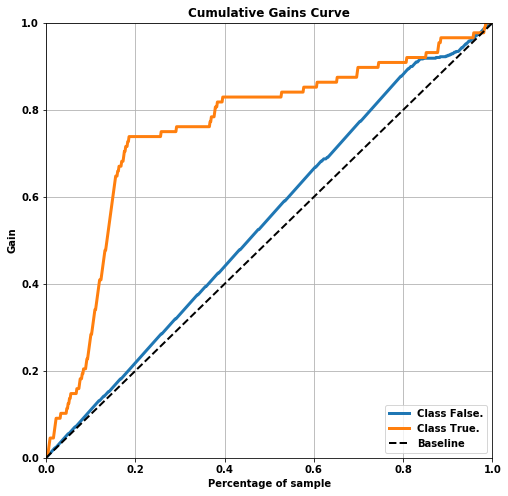

In [205]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas_weights, figsize=(8,8))

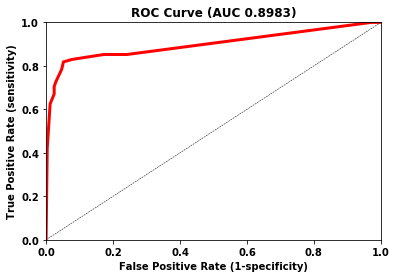

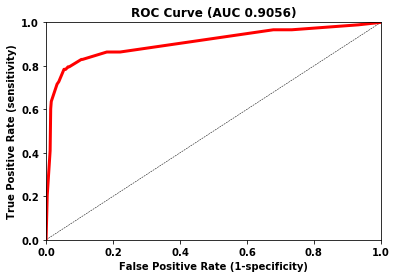

In [257]:
#ROC curve
def plot_roc(clf, X_test,y_test):
    pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr , thresholds = roc_curve(y_test, pred,pos_label="True.")
    plt.plot([0,1],[0,1], linestyle="--",c='black',lw=.5)
    plt.plot(fpr, tpr, c='red',lw=3)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('ROC Curve (AUC {:.4f})'.format(roc_auc_score(y_test,pred)))
    plt.show()
    
plot_roc(clf_CART,X_test, y_test)
plot_roc(clf_CART_weights, X_test, y_test)

In [274]:
#Precision/Recall curve
def plot_prc(clf, X_test, y_test, precision=None, recall=None, threshold=None):
    pr,rc,ts = prc(y_test, clf.predict_proba(X_test)[:,1], pos_label='True.')
    pr,rc,ts = list(pr), list(rc), list(ts)
    i=None
    
    if precision is not None:
        i = ts.index(min(t for t,p in zip(ts,pr) if p > precision))
    elif recall is not None:
        i = ts.index(max(t for t,r in zip(ts,rc) if r > racall))
    elif threshold is not None:
        i = ts.index(max(t for t in ts if t < threshold))

    plt.plot(pr,rc,c='red', lw=3)

    if i is not None:
        plt.plot([pr[i]], [rc[i]], marker='o', color='black')
        plt.text(pr[i], rc[i], '({:.2f}, {:.2f} )'.format(pr[i],rc[i]), fontdict = {'ha':'right','va':'center'})

    plt.grid()
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title('Precision and Recall')
    plt.xlabel('Precision')
    plt.ylabel('Recall/Sensitivity')
    plt.show()


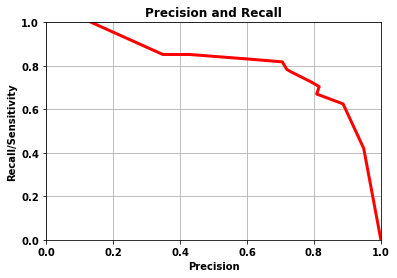

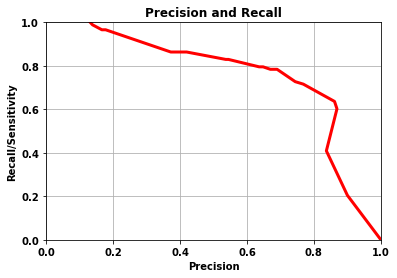

In [275]:
plot_prc(clf_CART, X_test,y_test)
plot_prc(clf_CART_weights, X_test, y_test)

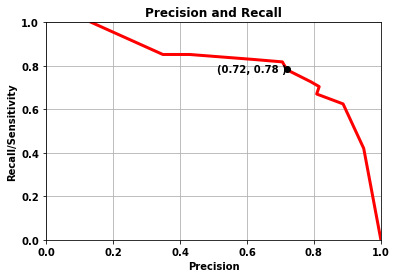

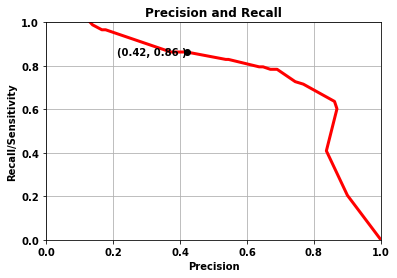

In [276]:
plot_prc(clf_CART, X_test,y_test, threshold=0.5)
plot_prc(clf_CART_weights, X_test, y_test, threshold=0.5)